<a href="https://colab.research.google.com/github/AyA-EhaB/FEDIS_Tasks/blob/main/Logistic_regression_from_scratch_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resources
- https://medium.com/data-science/multiclass-logistic-regression-from-scratch-9cc0007da372

## Multiclass logistic regression
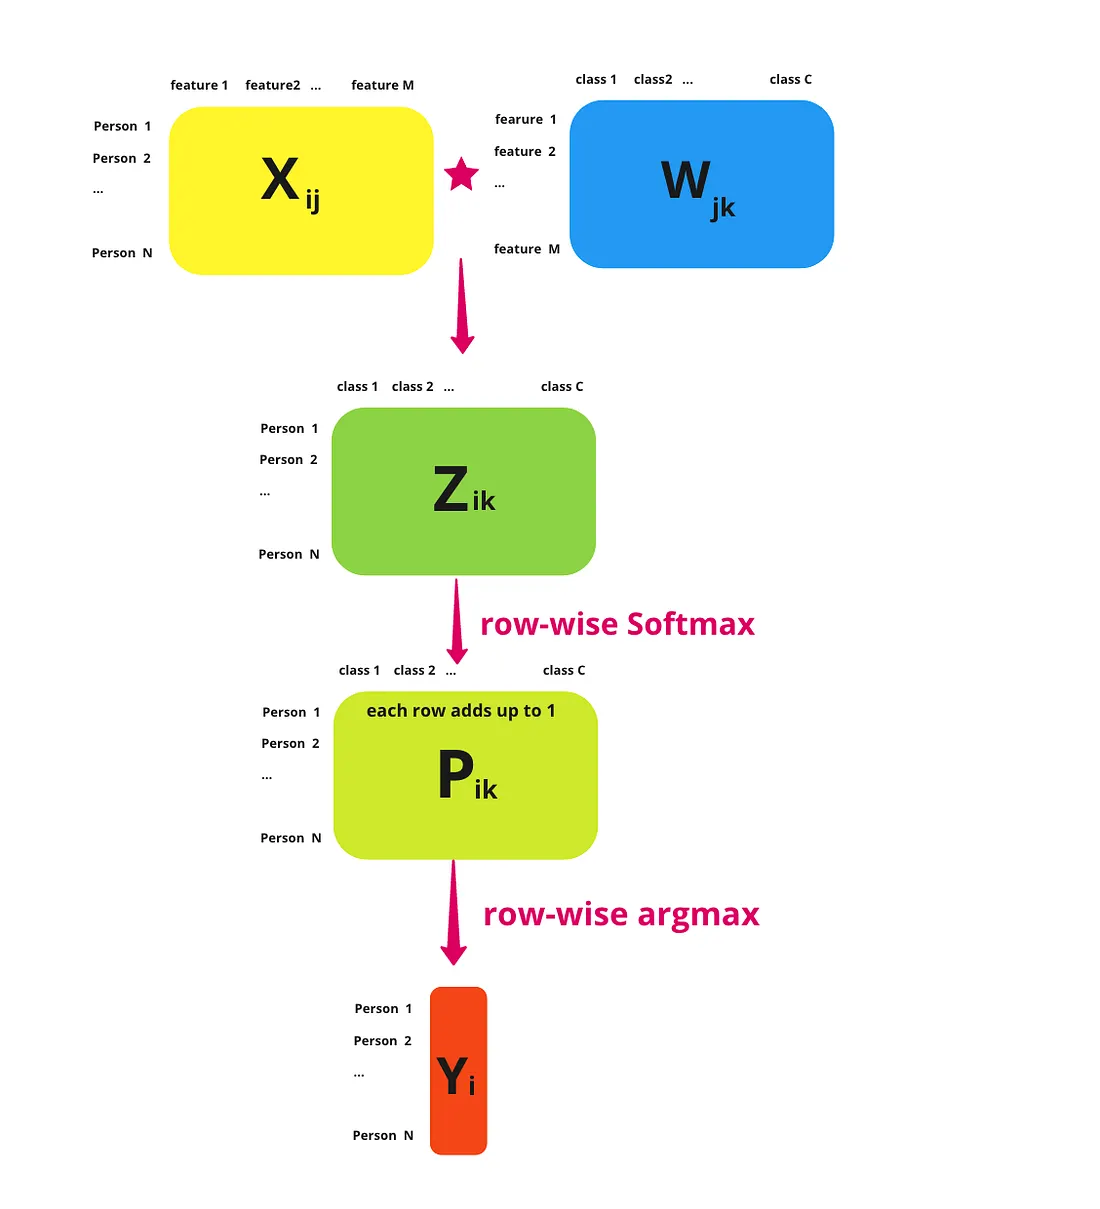

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_iris, load_digits

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler


- What is logits ?

logits: this is usually a 2D NumPy array (matrix).

Each row = one training example.

Each column = one class.

In [ ]:
def softMax(logits):
    # logits: shape (N_samples, n_classes)
    # subtract max for numerical stability
    z = logits - np.max(logits, axis=1, keepdims=True)
    expz = np.exp(z)
    return expz / np.sum(expz, axis=1, keepdims=True)


In [ ]:
def predict_probability(X, W, b):
  z = np.dot(X,W) + b
  return softMax(z)

## Loss function
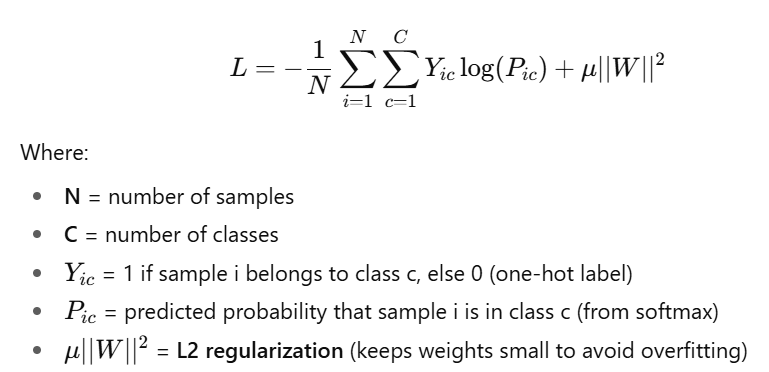
- Y * log(P) → measures how close predictions are to the true labels.

- -ve sign → makes the loss positive (since log(P) ≤ 0).

- mean → averages across all samples.

- +ve mu * ||W||² → adds penalty for large weights, preventing overfitting.

In [ ]:
def compute_loss(Y_true, P_pred, W, mu = 0.01):
  eps = 1e-15
  P_pred = np.clip(P_pred, eps, 1-eps)
  """This ensures all predicted probabilities
     are within [eps, 1-eps].
     Example: if the model predicts exactly 0 for
     a class → log(0) breaks → we replace 0 with 1e-15.
  """
  cross_entropy  =-np.mean(np.sum(Y_true*np.log(P_pred),axis = 1))

  L2_reg_term = mu* np.sum(W*W)
  Loss = cross_entropy + L2_reg_term
  return Loss

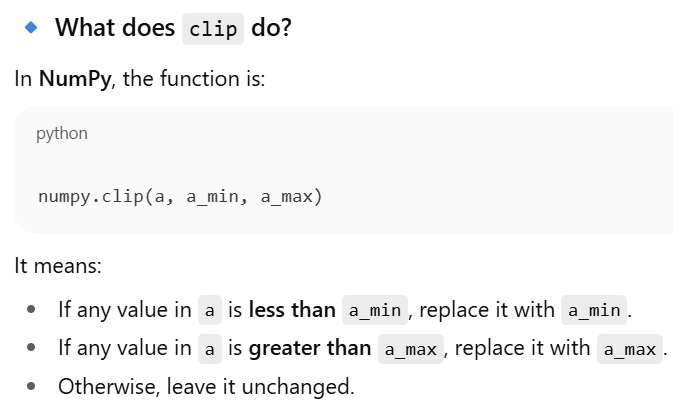

### Compute Gradiants
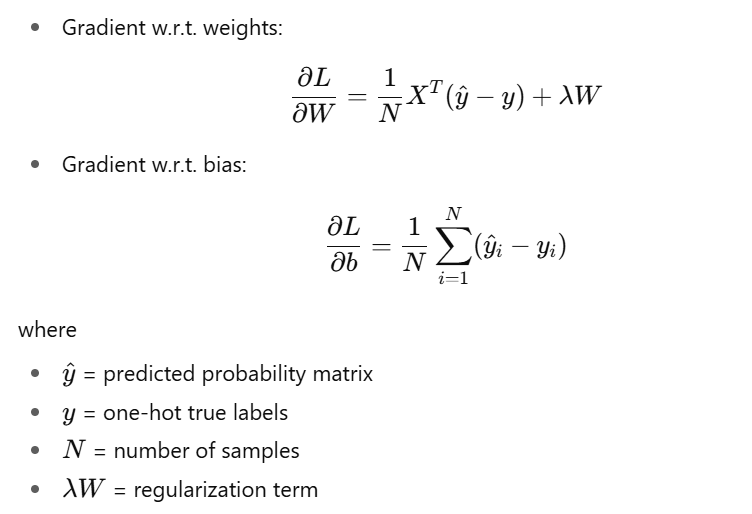

In [ ]:
def compute_gradients(X, y_true, y_pred, W):
  N = X.shape[0]

  dW = (1/N)*np.dot(X.T,(y_pred - y_true))

  db = (1/N)* np.sum(y_pred - y_true,axis = 0)

  return dW, db

In [ ]:
def update_parameters(W,b, dW, db, learning_rate = 0.01):
  W = W - learning_rate*dW
  b = b - learning_rate*db
  return W,b

In [ ]:
def train(X, y, epochs=1000, learning_rate=0.01):
    n_features = X.shape[1]
    n_classes = y.shape[1]
    W = np.zeros((n_features, n_classes))
    b = np.zeros(n_classes)

    for i in range(epochs):
        y_pred = predict_probability(X, W, b)
        loss = compute_loss(y, y_pred, W)

        dW, db = compute_gradients(X, y, y_pred, W)
        W, b = update_parameters(W, b, dW, db, learning_rate)

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")

    return W, b


## Prepare Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Train
W, b = train(X_train, y_train, epochs=1000, learning_rate=0.01)


Epoch 0: Loss = 1.0986
Epoch 100: Loss = 0.6433
Epoch 200: Loss = 0.5252
Epoch 300: Loss = 0.4709
Epoch 400: Loss = 0.4387
Epoch 500: Loss = 0.4169
Epoch 600: Loss = 0.4009
Epoch 700: Loss = 0.3886
Epoch 800: Loss = 0.3786
Epoch 900: Loss = 0.3704


In [ ]:
def predict(X, W, b):
    probs = predict_probability(X, W, b)
    return np.argmax(probs, axis=1)


In [ ]:
y_test_pred = predict(X_test, W, b)
y_test_true = np.argmax(y_test, axis=1)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


accuracy = accuracy_score(y_test_true, y_test_pred)
print("Test Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test_true, y_test_pred, target_names=iris.target_names))


Test Accuracy: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.86      0.60      0.71        10
   virginica       0.69      0.90      0.78        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



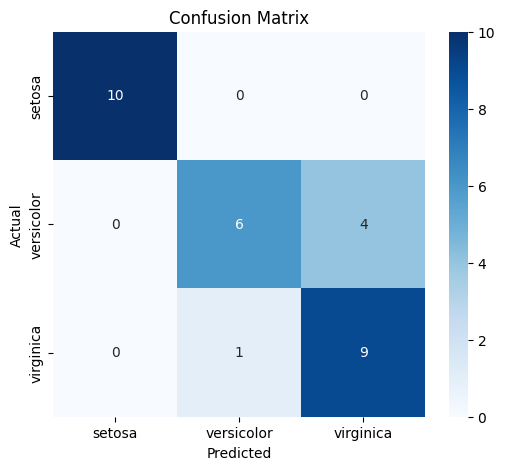

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
